# 1. Sử dụng modol Base Yolov8 để test img_test

In [1]:
!pip install ultralytics wandb opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable



0: 544x640 1 person, 240.2ms
Speed: 7.6ms preprocess, 240.2ms inference, 7.2ms postprocess per image at shape (1, 3, 544, 640)


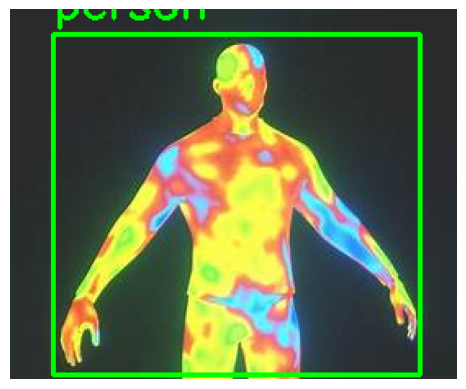


0: 480x640 4 persons, 167.2ms
Speed: 2.6ms preprocess, 167.2ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)


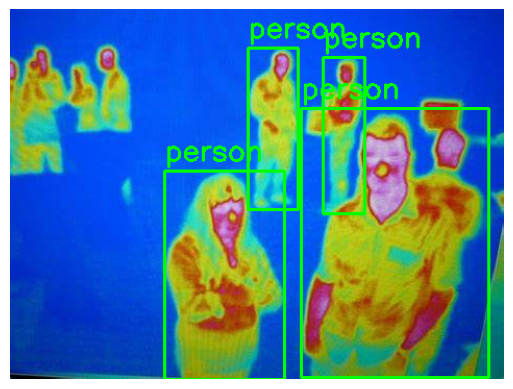


0: 448x640 5 persons, 219.7ms
Speed: 14.7ms preprocess, 219.7ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


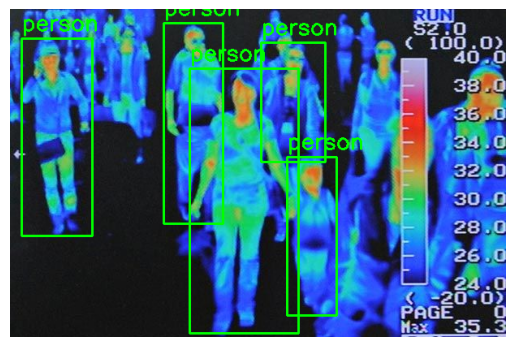

In [17]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Tải mô hình YOLOv8n chưa qua huấn luyện
model = YOLO("yolov8n.pt")

# Hàm để chạy suy luận và vẽ bounding box cho từng ảnh trong tập img_test
def plot_detections(image_path, model):
    # Đọc ảnh
    image = cv2.imread(image_path)
    
    # Chạy mô hình YOLO trên ảnh
    results = model(image)
    
    # Lấy bounding boxes từ kết quả suy luận
    boxes = results[0].boxes.xyxy.cpu().numpy()
    labels = results[0].names  # Nhãn đối tượng

    # Vẽ bounding box trên ảnh
    for box in boxes:
        x1, y1, x2, y2 = map(int, box[:4])
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Màu xanh lá cây
        cv2.putText(image, labels[0], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Chuyển đổi ảnh từ BGR sang RGB để hiển thị
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Đường dẫn tới thư mục chứa ảnh
img_dir = './img_test'
image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Vẽ bounding boxes cho từng ảnh trong thư mục img_test
for image_file in image_files:
    image_path = os.path.join(img_dir, image_file)
    plot_detections(image_path, model)




In [24]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import wandb

# Khởi tạo phiên WandB
run = wandb.init()

# Tải model1 (3 epochs) từ link Artifact mới
model1_artifact = run.use_artifact('doanngoccuong_nh/ThermalHumanDetect_YOLO/run_yr6mc76n_model:v0', type='model')
model1_dir = model1_artifact.download()
model1 = YOLO(f'{model1_dir}/best.pt')

# Tải model2 (30 epochs) từ Artifact cũ
model2_artifact = run.use_artifact('doanngoccuong_nh/ThermalHumanDetect_YOLO/run_20y0chz4_model:v0', type='model')
model2_dir = model2_artifact.download()
model2 = YOLO(f'{model2_dir}/best.pt')


--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u1ea2' in position 123: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Us

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  



Vẽ bounding boxes với Model 1:


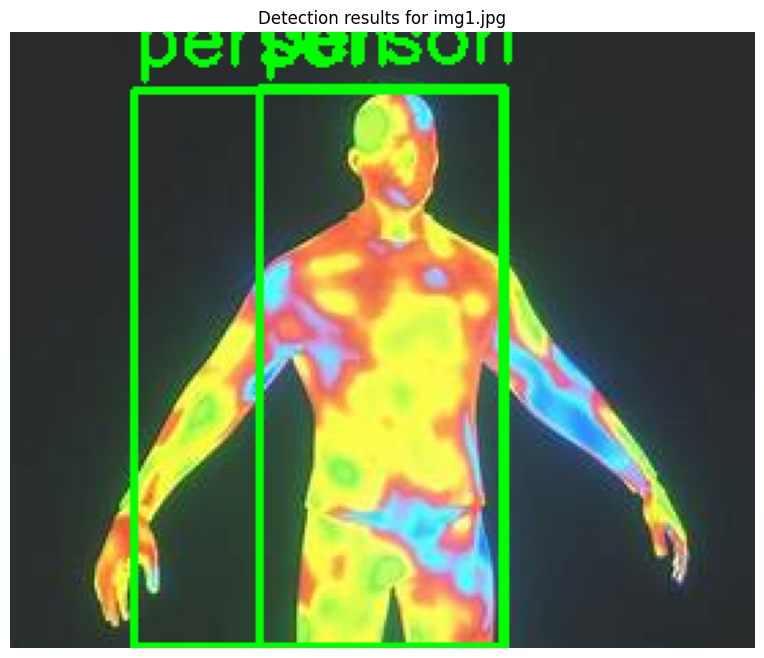

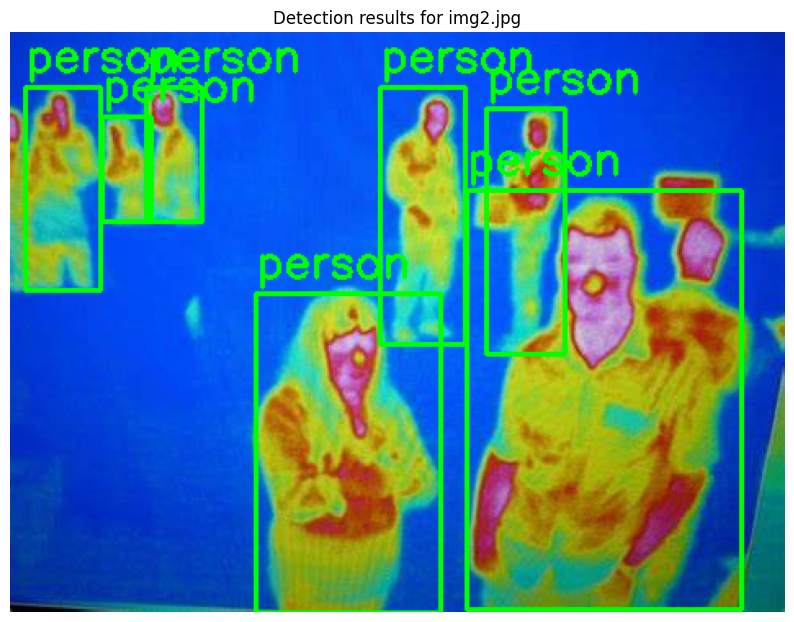

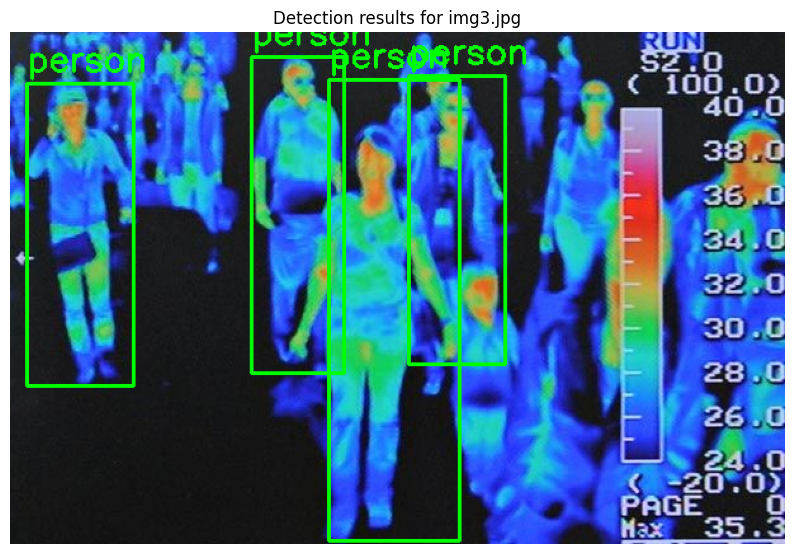


Vẽ bounding boxes với Model 2:


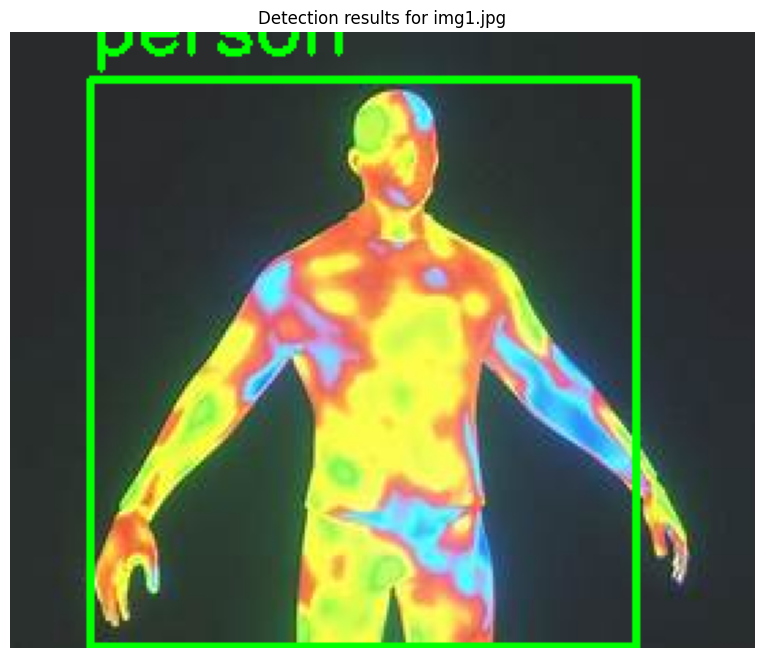

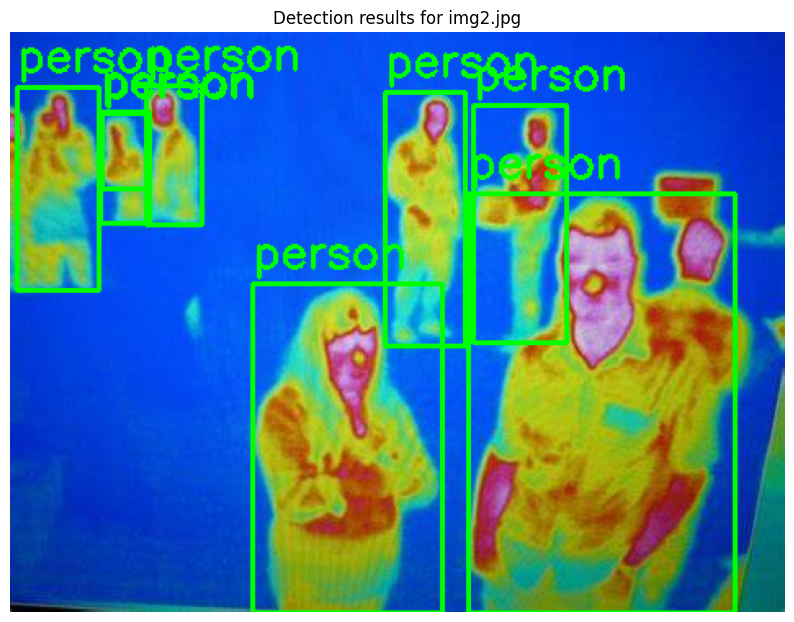

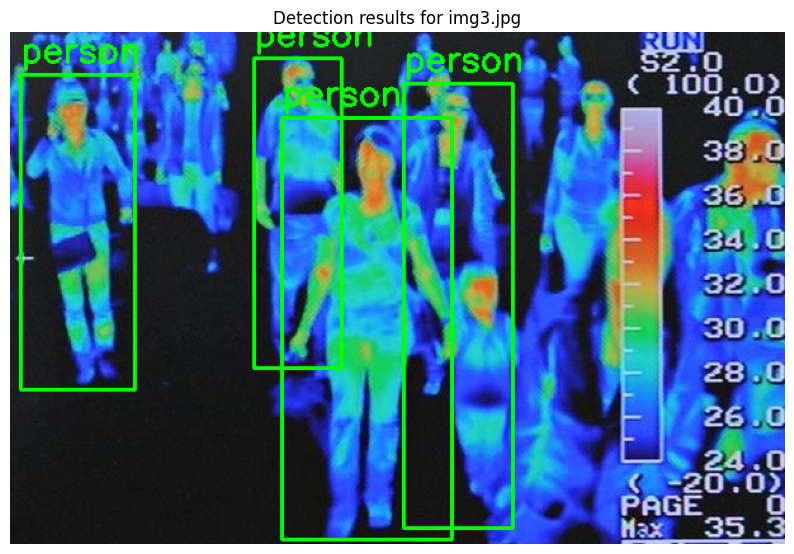

In [25]:

# Hàm để chạy suy luận và vẽ bounding box cho từng ảnh
def inference_and_plot(image_path, model):
    # Đọc ảnh
    image = cv2.imread(image_path)
    
    # Chạy suy luận
    model_output = model(image, conf=0.6, verbose=False)
    
    # Lấy tọa độ bounding box và nhãn
    detections = model_output[0].boxes.xyxy.cpu().numpy()
    labels = model_output[0].names
    
    # Vẽ bounding box và nhãn lên ảnh
    for box in detections:
        x1, y1, x2, y2 = map(int, box[:4])
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Vẽ khung xanh
        cv2.putText(image, labels[0], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Gắn nhãn
    
    # Chuyển đổi ảnh từ BGR sang RGB để hiển thị
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.title(f'Detection results for {os.path.basename(image_path)}')
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Đường dẫn tới thư mục chứa ảnh
img_dir = './img_test'
image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Chạy suy luận và vẽ bounding boxes cho mỗi ảnh trong img_test với model1 và model2
for model_name, model in [('Model 1', model1), ('Model 2', model2)]:
    print(f"\nVẽ bounding boxes với {model_name}:")
    for image_file in image_files:
        image_path = os.path.join(img_dir, image_file)
        inference_and_plot(image_path, model)
